In [1]:
import os
from PIL import Image
import sys
from itertools import product
from PIL import Image, ImageOps

In [2]:
dir_name = 'img'
files = os.listdir(dir_name)
files

['hologram.png', 'santa.png', 'yoroshiku.png']

In [3]:
santa = files[1]
santa

'santa.png'

In [4]:
os.path.join(dir_name, santa)

'img\\santa.png'

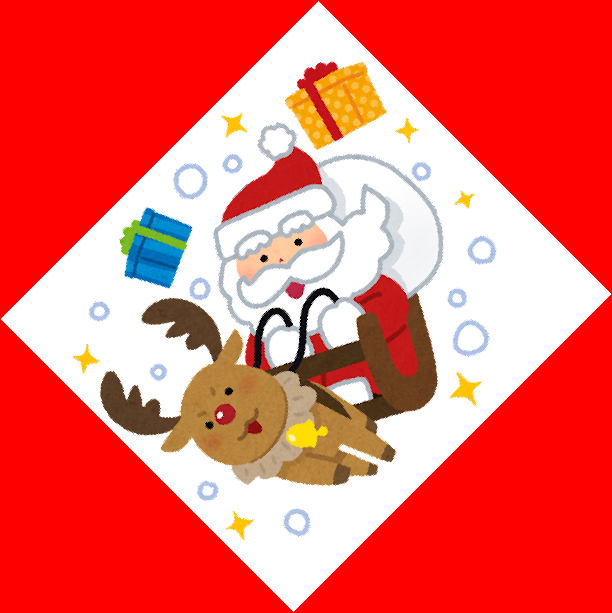

In [13]:
santa_img = Image.open(os.path.join(dir_name, santa))
santa_rotate = santa_img.rotate(45,fillcolor=(255, 0, 0), expand=True)
santa_rotate

In [ ]:
import cv2
import numpy as np

image = cv2.imread('yoroshiku.png')

In [7]:
holo = files[0]
os.path.join(dir_name, holo)

'img\\hologram.png'

In [34]:
yoro = files[2]
os.path.join(dir_name, yoro)

'img\\yoroshiku.png'

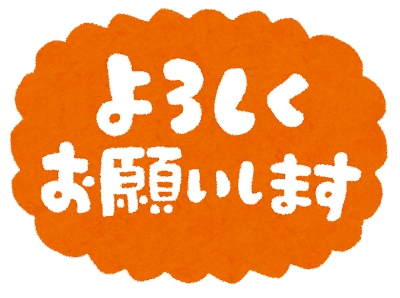

In [69]:
yoro_img = Image.open(os.path.join(dir_name, yoro))
yoro_img

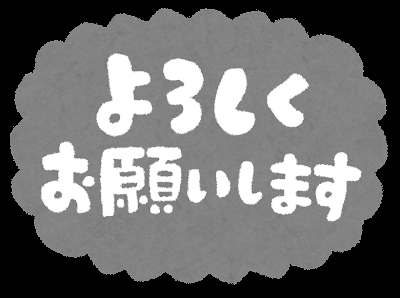

In [70]:
# 参考までにPILの機能でグレー変換
yoro_gray = yoro_img.convert('L')
yoro_gray.save('yoro_gray.png')
yoro_gray

In [74]:
# マスク画像のベースを黒で新規作成
yoro_mask = Image.new("1", yoro_img.size, 'black')
# マスク画像イメージの表示
#yoro_mask

In [65]:
yoro_img.getpixel((0,0))

(0, 0, 0, 0)

In [75]:
for y in range(height): 
    for x in range(width):
        if sum(yoro_img.getpixel((x, y))) > 200:
            yoro_img.putpixel((x, y), 0)
        else:
            yoro_img.putpixel((x, y), 255)

# マスク画像表示 
print("よろしくマスク ", yoro_img.size, yoro_img.mode)
#yoro_mask

よろしくマスク  (400, 298) RGBA


In [76]:
holo_img = Image.open(os.path.join(dir_name, holo)).resize(yoro_img.size)
#holo_img

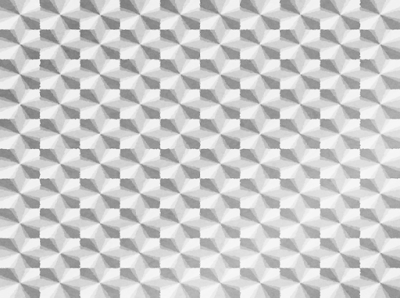

In [71]:
# 参考までにPILの機能でグレー変換
holo_gray = holo_img.convert('L')
holo_gray.save('holo_gray.png')
holo_gray

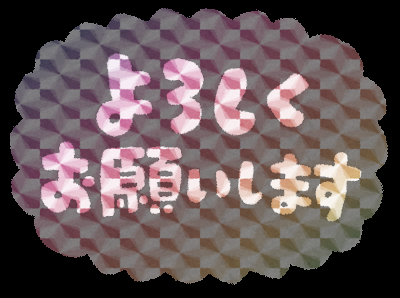

In [73]:
holo_img = Image.open(os.path.join(dir_name, holo)).resize(yoro_img.size)
yoro_gray = Image.open('yoro_gray.png')

holo_gray = Image.new(mode=holo_img.mode, size=holo_img.size, color=(0,0,0))

im = Image.composite(holo_img, holo_gray, yoro_gray)
im.save('out.png')
im